<a href="https://colab.research.google.com/github/WTongoing/Classify-Countries-using-K-Means-and-Hierarchical-Clustering-based-on-Selected-Attributes/blob/main/IE5374_Project1_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [ ]:
from sklearn.cluster import KMeans
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('World Indicators.csv')
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


## **1. data preprocessing** 

In [ ]:
#data cleaning,normalize data types
df['Business Tax Rate'] = df['Business Tax Rate'].str.strip("%").astype(float)/100
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.strip("$")
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(",","").astype(float)
df['GDP'] = df['GDP'].str.strip("$")
df['GDP'] = df['GDP'].str.replace(",","").astype(float)
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

**use *mean* value fo fill NAN value**:

In [ ]:
# fill the NAN value with mean value
df['Birth Rate'] = df['Birth Rate'].fillna(df['Birth Rate'].mean())
df['Business Tax Rate'] = df['Business Tax Rate'].fillna(df['Business Tax Rate'].mean())
df['Days to Start Business'] = df['Days to Start Business'].fillna(df['Days to Start Business'].mean())
df['Energy Usage'] = df['Energy Usage'].fillna(df['Energy Usage'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Health Exp % GDP'] = df['Health Exp % GDP'].fillna(df['Health Exp % GDP'].mean())
df['Health Exp/Capita'] = df['Health Exp/Capita'].fillna(df['Health Exp/Capita'].mean())
df['Hours to do Tax'] = df['Hours to do Tax'].fillna(df['Hours to do Tax'].mean())
df['Infant Mortality Rate'] = df['Infant Mortality Rate'].fillna(df['Infant Mortality Rate'].mean())
df['Internet Usage'] = df['Internet Usage'].fillna(df['Internet Usage'].mean())
df['Lending Interest'] = df['Lending Interest'].fillna(df['Lending Interest'].mean())
df['Life Expectancy Female'] = df['Life Expectancy Female'].fillna(df['Life Expectancy Female'].mean())
df['Life Expectancy Male'] = df['Life Expectancy Male'].fillna(df['Life Expectancy Male'].mean())
df['Mobile Phone Usage'] = df['Mobile Phone Usage'].fillna(df['Mobile Phone Usage'].mean())
df['Population 0-14'] = df['Population 0-14'].fillna(df['Population 0-14'].mean())
df['Population 15-64'] = df['Population 15-64'].fillna(df['Population 15-64'].mean())
df['Population 65+'] = df['Population 65+'].fillna(df['Population 65+'].mean())
df['Population Urban'] = df['Population Urban'].fillna(df['Population Urban'].mean())

In [ ]:
#data filtering,keep the attributes which is numeric
df_nonnominal = df.loc[:,'Birth Rate':'Population Urban']
df_nonnominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              208 non-null    float64
 1   Business Tax Rate       208 non-null    float64
 2   Days to Start Business  208 non-null    float64
 3   Energy Usage            208 non-null    float64
 4   GDP                     208 non-null    float64
 5   Health Exp % GDP        208 non-null    float64
 6   Health Exp/Capita       208 non-null    float64
 7   Hours to do Tax         208 non-null    float64
 8   Infant Mortality Rate   208 non-null    float64
 9   Internet Usage          208 non-null    float64
 10  Lending Interest        208 non-null    float64
 11  Life Expectancy Female  208 non-null    float64
 12  Life Expectancy Male    208 non-null    float64
 13  Mobile Phone Usage      208 non-null    float64
 14  Population 0-14         208 non-null    fl

In [ ]:
#change the dataframe into the nd.array form
df_nonnominal_array = np.array(df_nonnominal)
df_nonnominal_array

array([[2.50000000e-02, 7.20000000e-01, 2.50000000e+01, ...,
        6.81000000e-01, 4.70000000e-02, 6.82000000e-01],
       [4.60000000e-02, 5.21000000e-01, 6.60000000e+01, ...,
        4.99000000e-01, 2.40000000e-02, 4.09000000e-01],
       [3.70000000e-02, 6.59000000e-01, 2.90000000e+01, ...,
        5.39000000e-01, 2.90000000e-02, 4.23000000e-01],
       ...,
       [1.50000000e-02, 4.19000000e-01, 7.00000000e+00, ...,
        6.38000000e-01, 1.39000000e-01, 9.46000000e-01],
       [2.00000000e-02, 6.28000000e-01, 1.41000000e+02, ...,
        6.51000000e-01, 5.80000000e-02, 8.88000000e-01],
       [1.10000000e-02, 4.46430939e-01, 3.03314917e+01, ...,
        6.49000000e-01, 1.45000000e-01, 9.48000000e-01]])

In [ ]:
# data scaling
instance = sklearn.preprocessing.StandardScaler() #instantiate
df_nonnominal_array = instance.fit_transform(df_nonnominal_array)
df_scalling = pd.DataFrame(df_nonnominal_array)
df_scalling

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.309875,0.817134,-1.012856e-01,-0.200087,-0.134077,-0.872725,-4.868150e-01,7.470430e-01,-1.805197e-01,-0.999143,-0.677654,-0.076171,0.112034,-0.140343,-0.145267,6.651954e-01,-0.600667,0.433927
1,2.317576,0.222733,6.776165e-01,-0.312373,-0.205749,-1.246289,-5.178956e-01,1.181869e-02,3.313068e+00,-0.999143,1.040834,-2.015675,-2.095040,-1.097114,1.844906,-1.998498e+00,-1.054759,-0.691369
2,1.457132,0.634931,-2.529516e-02,-0.351350,-0.278829,-0.835369,-5.992702e-01,-4.038658e-02,1.358322e+00,-1.359996,0.000000,-1.301121,-1.165746,-0.379535,1.408039,-1.413071e+00,-0.956043,-0.633662
3,0.214270,-0.751009,5.636308e-01,-0.357489,-0.272793,-0.573875,-3.901827e-01,-5.537384e-01,4.849255e-01,-0.999143,-0.200296,-2.730229,-2.443526,1.294814,0.514888,-1.544026e-01,-0.837585,-0.048343
4,1.935156,-0.034144,-3.292570e-01,0.000000,-0.276489,-0.125598,-5.964447e-01,-4.038658e-02,1.691045e+00,-1.359996,0.000000,-1.709438,-1.514231,-1.097114,1.660451,-1.735056e+00,-1.035016,-1.284932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000000,0.000000,-6.749308e-17,0.000000,0.000000,0.000000,-1.284892e-16,2.472939e-16,-1.442954e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.624887e-15,0.000000,1.361368
204,-0.837383,0.055465,-4.812379e-01,8.335133,11.440534,4.095671,4.166230e+00,-4.014731e-01,-8.875553e-01,1.165970,-1.425514,0.842542,0.925167,-0.140343,-0.873379,4.895672e-01,1.097243,0.957416
205,-0.646173,-0.081935,-4.432426e-01,-0.348693,-0.248681,0.770955,6.698437e-02,2.467424e-01,-7.211940e-01,0.444265,-0.391239,0.740463,0.576682,1.055621,-0.620966,3.586124e-02,1.215702,1.522125
206,-0.168149,0.542336,2.102437e+00,-0.087523,-0.045456,-0.835369,-3.432792e-01,2.543774e+00,-5.548327e-01,0.083413,0.786243,0.434225,0.344358,0.098850,0.039188,2.261250e-01,-0.383492,1.283051


## **2. find optimal k & Evaluate cluster quality**

In [ ]:
!pip install validclust

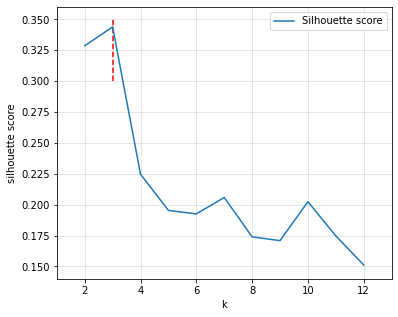

In [ ]:
#find optimal k by using silhouette coefficient
from sklearn.metrics import silhouette_score

silhouette_score_list = []

def silhouette_calculation(k,dataframe):
  labels = KMeans(n_clusters=k).fit_predict(dataframe)
  SH_score = silhouette_score(dataframe,labels)
  SH_score = round(SH_score,6)
  silhouette_score_list.append([k,SH_score])
  #print('the silhouette_score for {} clusters is: {}'.format(k,SH_score))

for k in range(2,13):
  silhouette_calculation(k,df_scalling)

#draw the lineplot of Silhouette score of different K
df_SH_score = pd.DataFrame(silhouette_score_list)
x = df_SH_score.loc[:,0].to_list()
y = df_SH_score.loc[:,1].to_list()

fig,ax = plt.subplots(figsize=(6,5))
ax.plot(x,y,label='Silhouette score')
ax.vlines([3],0.3,0.35,linestyle='dashed',colors='red')
#ax.vlines([4],0.2,0.25,linestyle='dashed',colors='red')
#ax.vlines([2],0.32,0.34,linestyle='dashed',colors='red')
ax.legend()

plt.xlabel('k')
plt.ylabel('silhouette score')
plt.ylim(0.14,0.36)
plt.xlim(1,13)
plt.grid(alpha=0.4)

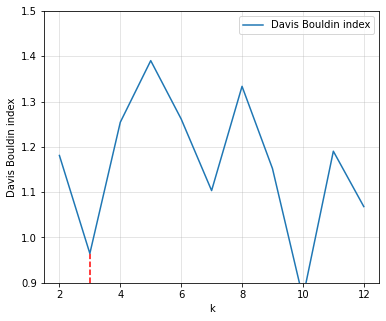

In [ ]:
#find optimal k by using Davis_Bouldin index
from sklearn.metrics import davies_bouldin_score

davis_score_list = []

def Davis_Bouldin_calculation(k,dataframe):
  labels = KMeans(n_clusters=k).fit_predict(dataframe)
  davis_score = davies_bouldin_score(dataframe,labels)
  davis_score = round(davis_score,6)
  davis_score_list.append([k,davis_score])
  #print('the Dunn validity index for {} clusters is: {}'.format(k,dunn_score))

for k in range(2,13):
  Davis_Bouldin_calculation(k,df_scalling)

#draw the lineplot of Dunn index of different K
df_davis_score = pd.DataFrame(davis_score_list)
x = df_davis_score.loc[:,0].to_list()
y = df_davis_score.loc[:,1].to_list()

fig,ax = plt.subplots(figsize=(6,5))
ax.plot(x,y,label='Davis Bouldin index')
ax.vlines([3],0.9,0.965,linestyle='dashed',colors='red')
ax.legend()

plt.xlabel('k')
plt.ylabel('Davis Bouldin index')
plt.ylim(0.9,1.5)
plt.grid(alpha=0.4)

**According to silhouette_score(and the davies_bouldin index),we get the highest silhouette score and the lowest Davis_Bouldin score when k=3,so we supposed the optimal k is 3.**

**Then we use k=3 as follows to train data, using Internal validation metrics to report the cluster quality.**

In [ ]:
#validate k by using Calinski-Harabasz coefficient
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

calinski_harabasz_score_list = []
hier_calinski_harabasz_score_list = []

def Calinski_Harabasz_calculation(k,dataframe):
  labels = KMeans(n_clusters=k).fit_predict(dataframe)
  CH_score = calinski_harabasz_score(dataframe,labels)
  CH_score = round(CH_score,6)
  #calinski_harabasz_score_list.append([k,CH_score])
  print('the Kmeans Calinski_Harabasz_score for {} clusters is: {}'.format(k,CH_score))

def hierarchical_Calinski_Harabasz_calculation(k,dataframe):
  cluster_hier_labels = AgglomerativeClustering(n_clusters=k).fit_predict(dataframe)
  hier_CH_score = calinski_harabasz_score(dataframe,cluster_hier_labels)
  hier_CH_score = round(hier_CH_score,6)
  #hier_calinski_harabasz_score_list.append([k,hier_CH_score])
  print('the Hierarchical Calinski_Harabasz_score for {} clusters is: {}'.format(k,hier_CH_score))

Calinski_Harabasz_calculation(3,df_scalling)
hierarchical_Calinski_Harabasz_calculation(3,df_scalling)

the Kmeans Calinski_Harabasz_score for 3 clusters is: 73.96194
the Hierarchical Calinski_Harabasz_score for 3 clusters is: 71.599749


In [ ]:
#validate k by using Dunn index
from validclust import dunn
from sklearn.metrics import pairwise_distances

dunn_score_list = []
hier_dunn_score_list = []

def Dunn_calculation(k,dataframe):
  labels = KMeans(n_clusters=k).fit_predict(dataframe)
  dist = pairwise_distances(dataframe)
  dunn_score = dunn(dist,labels)
  dunn_score = round(dunn_score,6)
  dunn_score_list.append([k,dunn_score])
  print('the Kmeans Dunn validity index for {} clusters is: {}'.format(k,dunn_score))

def hier_dunn_calculation(k,dataframe):
  hier_labels = AgglomerativeClustering(n_clusters=k).fit_predict(dataframe)
  dist = pairwise_distances(dataframe)
  dunn_score = dunn(dist,hier_labels)
  dunn_score = round(dunn_score,6)
  hier_dunn_score_list.append([k,dunn_score])
  print('the hierarchical Dunn validity index for {} clusters is: {}'.format(k,dunn_score))

Dunn_calculation(3,df_scalling)
hier_dunn_calculation(3,df_scalling)

the Kmeans Dunn validity index for 3 clusters is: 0.067607
the hierarchical Dunn validity index for 3 clusters is: 0.088611


Since we use Calinski_Harabasz_score and Dunn index to validate the cluster quality, and **we get that when we use CH score, the CH score of KMeans and Hierarchical are closely, so we use Dunn index to determine which clustering method are better**.

According to Dunn index, we find that Dunn index of hierarchical clustering are much higher than Dunn index of KMeans, so **we think hierarchical clustering is a better clustering method in this case**.

However, I will show both KMeans and Hierarchical clustering steps when k=3 as follows:

In [ ]:
#test by using validClust
from validclust import ValidClust

vclust = ValidClust(
    k=list(range(2, 10)), 
    methods=['kmeans','hierarchical']
)
cvi_vals = vclust.fit_predict(df_scalling)
print(cvi_vals)

                                  2          3          4          5  \
method       index                                                     
kmeans       silhouette    0.328613   0.342460   0.257340   0.193813   
             calinski    102.242104  73.961940  66.758489  60.910498   
             davies        1.181046   0.972824   1.079668   1.395762   
             dunn          0.053064   0.064044   0.054002   0.065610   
hierarchical silhouette    0.324540   0.335090   0.254723   0.213893   
             calinski     98.550656  71.599749  61.398025  56.977216   
             davies        1.241006   0.997518   1.044434   1.410579   
             dunn          0.088611   0.088611   0.088611   0.093540   

                                 6          7          8          9  
method       index                                                   
kmeans       silhouette   0.207132   0.201199   0.173062   0.176721  
             calinski    57.358915  56.335888  53.347272  54.498288  

## **3. The details of all groups by using KMeans and the countries within different groups**

In [ ]:
#create KMeans function to train data and give them corresponding labels
def train_by_kmeans(k,dataframe):
  cluster = KMeans(n_clusters=k)
  cluster = cluster.fit(dataframe)
  #print(cluster.labels_)
  df_kmeans = pd.DataFrame(cluster.labels_)
  df_kmeans.columns = ['cluster label']
  print(df_kmeans['cluster label'].value_counts())
  df_merge_label = pd.concat([df,df_kmeans],axis=1)
  return df_merge_label

#training data with k=3
train_by_kmeans(3,df_scalling)

1    129
0     77
2      2
Name: cluster label, dtype: int64


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster label
0,0.025000,0.720000,25.000000,4.185200e+04,1.990709e+11,0.044000,233.000000,451.000000,0.02300,0.100000,...,72.000000,69.000000,0.900000,0.272000,0.68100,0.047000,0.682,Africa,Algeria,1
1,0.046000,0.521000,66.000000,1.357600e+04,1.041159e+11,0.034000,178.000000,282.000000,0.10700,0.100000,...,53.000000,50.000000,0.500000,0.477000,0.49900,0.024000,0.409,Africa,Angola,0
2,0.037000,0.659000,29.000000,3.761000e+03,7.294900e+09,0.045000,34.000000,270.000000,0.06000,0.000000,...,60.000000,58.000000,0.800000,0.432000,0.53900,0.029000,0.423,Africa,Benin,0
3,0.024000,0.195000,60.000000,2.215000e+03,1.529242e+10,0.052000,404.000000,152.000000,0.03900,0.100000,...,46.000000,47.000000,1.500000,0.340000,0.62500,0.035000,0.565,Africa,Botswana,0
4,0.042000,0.435000,13.000000,9.223794e+04,1.039576e+10,0.064000,39.000000,270.000000,0.06800,0.000000,...,56.000000,55.000000,0.500000,0.458000,0.51700,0.025000,0.265,Africa,Burkina Faso,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.021759,0.446431,30.331492,9.223794e+04,3.767045e+11,0.067362,1094.464865,279.283333,0.02734,0.376884,...,72.746193,68.035533,0.958673,0.286963,0.63555,0.077424,0.907,The Americas,Turks and Caicos Islands,1
204,0.013000,0.465000,5.000000,2.191193e+06,1.553380e+13,0.177000,8467.000000,187.000000,0.00600,0.700000,...,81.000000,76.000000,0.900000,0.197000,0.66900,0.133000,0.809,The Americas,United States,2
205,0.015000,0.419000,7.000000,4.430000e+03,4.723671e+10,0.088000,1213.000000,336.000000,0.01000,0.500000,...,80.000000,73.000000,1.400000,0.223000,0.63800,0.139000,0.946,The Americas,Uruguay,1
206,0.020000,0.628000,141.000000,7.019800e+04,3.164822e+11,0.045000,487.000000,864.000000,0.01400,0.400000,...,77.000000,71.000000,1.000000,0.291000,0.65100,0.058000,0.888,The Americas,"Venezuela, RB",1


**so, by using KMeans clustering with k=3, we have 3 groups, which contains 129 countries,77 countries and 2 countries separetly.**


In [ ]:
df_3_cluster = train_by_kmeans(3,df_scalling)
df_3_cluster_label0 = df_3_cluster.loc[df_3_cluster['cluster label']==0]
df_3_cluster_label1 = df_3_cluster.loc[df_3_cluster['cluster label']==1]
df_3_cluster_label2 = df_3_cluster.loc[df_3_cluster['cluster label']==2]
#for example: show the countries in k-Means cluster 2
df_3_cluster_label2

1    129
0     77
2      2
Name: cluster label, dtype: int64


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster label
60,0.012,0.635,38.0,2727728.0,7.321892e+12,0.051,274.0,358.0,0.013,0.4,...,76.0,74.0,0.7,0.180,0.735,0.085,0.506,Asia,China,2
204,0.013,0.465,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,...,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,2


**The countries in different groups by using KMeans are as follows:**

In [ ]:
#show the countries in different clusters
print("the cluster 0 has {} countries, which is {}".format(len(df_3_cluster_label0.loc[:,'Country'].to_list()),df_3_cluster_label0.loc[:,'Country'].to_list()))
print("\nthe cluster 1 has {} countries, which is {}".format(len(df_3_cluster_label1.loc[:,'Country'].to_list()),df_3_cluster_label1.loc[:,'Country'].to_list()))
print("\nthe cluster 2 has {} countries, which is {}".format(len(df_3_cluster_label2.loc[:,'Country'].to_list()),df_3_cluster_label2.loc[:,'Country'].to_list()))

the cluster 0 has 77 countries, which is ['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Kyrgyz Republic', 'Lao PDR', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Syrian Arab Republic', 'Yemen, Rep.', 'Kiribati', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Belize', 'Bolivia', 'Gua

In [ ]:
#visualization cluster in map
fig = px.choropleth(df_3_cluster,
                   locationmode='country names',
                   locations='Country',
                   color='cluster label',
                   color_continuous_scale='Oranges',
                   title='Coutries labels distribution'
                   )
fig.update_layout(title_text = 'Coutries labels distribution',geo = dict(projection={'type':'natural earth'}))
fig.show()

### **Parts of the countries properties included in each of the 3 groups are as follow(when using KMeans)：**

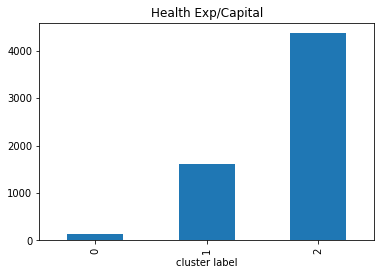

In [ ]:
df_3_cluster.groupby('cluster label')['Health Exp/Capita'].mean().plot.bar(title='Health Exp/Capital')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


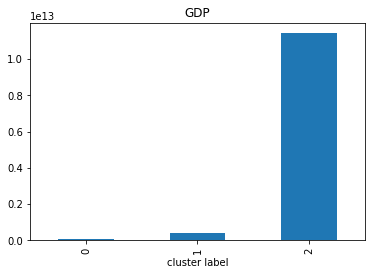

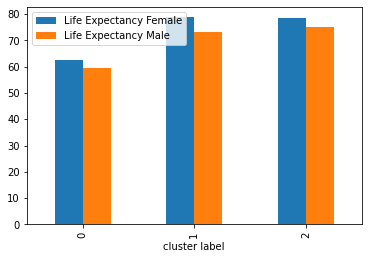

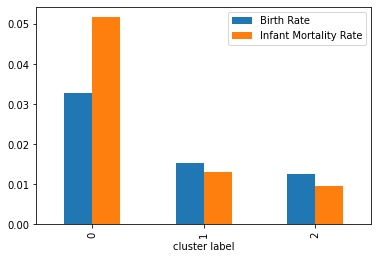

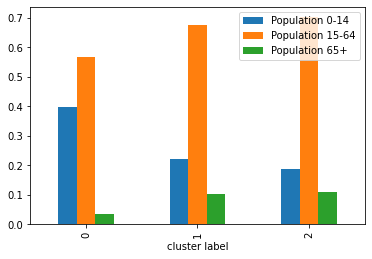

In [ ]:
df_3_cluster.groupby('cluster label')['GDP'].mean().plot.bar(title='GDP')
df_3_cluster.groupby('cluster label')['Life Expectancy Female','Life Expectancy Male'].mean().plot.bar()
df_3_cluster.groupby('cluster label')['Birth Rate','Infant Mortality Rate'].mean().plot.bar()
df_3_cluster.groupby('cluster label')['Population 0-14','Population 15-64','Population 65+'].mean().plot.bar()

### **describe different features in different groups:**

**From the bar plot above, we can get properties from different aspects under differnt clusters.**

*  ***For the aspect of GDP and Average Expenditure***, from the barplot of 'Health Exp/Capital' and 'GDP', countries in cluster 0 have the lowest GDP and the lowest health expenditure per capital; countries in cluster 1 have relatively lower GDP and medium health expenditure per capital; countries in cluster 2 have very high GDP and high health expenditure per capital.

*  ***For the aspect of Life Expectancy***, countries in cluster 0 have relatively lower life expectancy in both Male and Female when comparing with cluster 1 and 2.

*   ***For the aspect of Birth Rate and Infant Mortality Rate***, countries in cluster 0 have the highest Infant Mortality Rate and high birth rate; countries in cluster 1 have medium Infant Mortality Rate and medium birth rate; however, countries in cluster 2 have the lowest Infant Mortality Rate and low birth rate.

*  ***For the demographic composition***, in cluster 0, population within 0-14 year-old takes a very high proportion and populations above 65 year-old only takes a very low proportion; in cluster 1, population within 0-14 year-old takes a relatively low proportion and populations above 65 year-old takes a relatively high proportion when comparing with cluster 0; in cluster 2, population within 0-14 year-old takes a very low proportion and populations above 65 year-old takes a high proportion when comparing with other clusters.


## **4.The details of all groups by using Hierarchical and the countries within different groups**

In [ ]:
#create Hierarchical function to train data and give them corresponding labels
def train_by_Hier(k,dataframe):
  cluster = AgglomerativeClustering(n_clusters=k).fit(dataframe)
  #print(cluster.labels_)
  df_Hier = pd.DataFrame(cluster.labels_)
  df_Hier.columns = ['cluster label']
  print(df_Hier['cluster label'].value_counts())
  df_merge_hier_label = pd.concat([df,df_Hier],axis=1)
  return df_merge_hier_label

#training data with k=3
train_by_Hier(3,df_scalling)

0    122
1     84
2      2
Name: cluster label, dtype: int64


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster label
0,0.025000,0.720000,25.000000,4.185200e+04,1.990709e+11,0.044000,233.000000,451.000000,0.02300,0.100000,...,72.000000,69.000000,0.900000,0.272000,0.68100,0.047000,0.682,Africa,Algeria,0
1,0.046000,0.521000,66.000000,1.357600e+04,1.041159e+11,0.034000,178.000000,282.000000,0.10700,0.100000,...,53.000000,50.000000,0.500000,0.477000,0.49900,0.024000,0.409,Africa,Angola,1
2,0.037000,0.659000,29.000000,3.761000e+03,7.294900e+09,0.045000,34.000000,270.000000,0.06000,0.000000,...,60.000000,58.000000,0.800000,0.432000,0.53900,0.029000,0.423,Africa,Benin,1
3,0.024000,0.195000,60.000000,2.215000e+03,1.529242e+10,0.052000,404.000000,152.000000,0.03900,0.100000,...,46.000000,47.000000,1.500000,0.340000,0.62500,0.035000,0.565,Africa,Botswana,1
4,0.042000,0.435000,13.000000,9.223794e+04,1.039576e+10,0.064000,39.000000,270.000000,0.06800,0.000000,...,56.000000,55.000000,0.500000,0.458000,0.51700,0.025000,0.265,Africa,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.021759,0.446431,30.331492,9.223794e+04,3.767045e+11,0.067362,1094.464865,279.283333,0.02734,0.376884,...,72.746193,68.035533,0.958673,0.286963,0.63555,0.077424,0.907,The Americas,Turks and Caicos Islands,0
204,0.013000,0.465000,5.000000,2.191193e+06,1.553380e+13,0.177000,8467.000000,187.000000,0.00600,0.700000,...,81.000000,76.000000,0.900000,0.197000,0.66900,0.133000,0.809,The Americas,United States,2
205,0.015000,0.419000,7.000000,4.430000e+03,4.723671e+10,0.088000,1213.000000,336.000000,0.01000,0.500000,...,80.000000,73.000000,1.400000,0.223000,0.63800,0.139000,0.946,The Americas,Uruguay,0
206,0.020000,0.628000,141.000000,7.019800e+04,3.164822e+11,0.045000,487.000000,864.000000,0.01400,0.400000,...,77.000000,71.000000,1.000000,0.291000,0.65100,0.058000,0.888,The Americas,"Venezuela, RB",1


**so, by using Hierarchical clustering with k=3, we have 3 groups, which contains 122 countries,84 countries and 2 countries separetly.**

In [ ]:
df_Hier_3_cluster = train_by_Hier(3,df_scalling)
df_Hier_3_cluster_label0 = df_Hier_3_cluster.loc[df_Hier_3_cluster['cluster label']==0]
df_Hier_3_cluster_label1 = df_Hier_3_cluster.loc[df_Hier_3_cluster['cluster label']==1]
df_Hier_3_cluster_label2 = df_Hier_3_cluster.loc[df_Hier_3_cluster['cluster label']==2]
# show the countries in hierarchical cluster 
df_Hier_3_cluster_label2

0    122
1     84
2      2
Name: cluster label, dtype: int64


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster label
60,0.012,0.635,38.0,2727728.0,7.321892e+12,0.051,274.0,358.0,0.013,0.4,...,76.0,74.0,0.7,0.180,0.735,0.085,0.506,Asia,China,2
204,0.013,0.465,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,...,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,2


**The countries in different groups by using Hierarchical are as follows:**

In [ ]:
#show the countries in different clusters
print("the cluster 0 has {} countries, which is {}".format(len(df_Hier_3_cluster_label0.loc[:,'Country'].to_list()),df_Hier_3_cluster_label0.loc[:,'Country'].to_list()))
print("\nthe cluster 1 has {} countries, which is {}".format(len(df_Hier_3_cluster_label1.loc[:,'Country'].to_list()),df_Hier_3_cluster_label1.loc[:,'Country'].to_list()))
print("\nthe cluster 2 has {} countries, which is {}".format(len(df_Hier_3_cluster_label2.loc[:,'Country'].to_list()),df_Hier_3_cluster_label2.loc[:,'Country'].to_list()))

the cluster 0 has 122 countries, which is ['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'Georgia', 'Hong Kong SAR, China', 'Japan', 'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Singapore', 'Thailand', 'Vietnam', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.',

In [ ]:
#visualization cluster in map
fig = px.choropleth(df_Hier_3_cluster,
                   locationmode='country names',
                   locations='Country',
                   color='cluster label',
                   color_continuous_scale='Oranges',
                   title='Coutries labels distribution'
                   )
fig.update_layout(title_text = 'Coutries labels distribution',geo = dict(projection={'type':'natural earth'}))
fig.show()

### **Parts of the countries properties included in each of the 3 groups are as follow(when using Hierarchical)：**

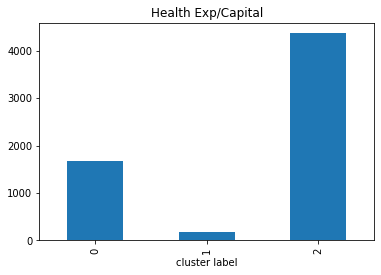

In [ ]:
df_Hier_3_cluster.groupby('cluster label')['Health Exp/Capita'].mean().plot.bar(title='Health Exp/Capital')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


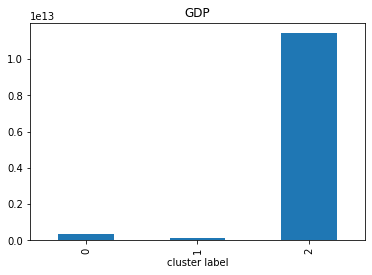

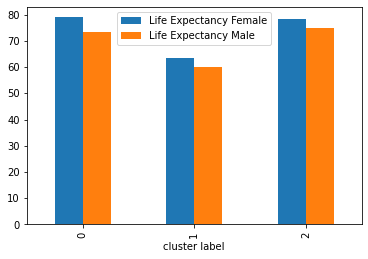

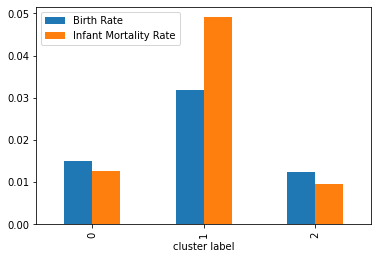

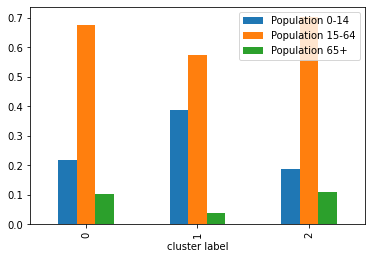

In [ ]:
df_Hier_3_cluster.groupby('cluster label')['GDP'].mean().plot.bar(title='GDP')
df_Hier_3_cluster.groupby('cluster label')['Life Expectancy Female','Life Expectancy Male'].mean().plot.bar()
df_Hier_3_cluster.groupby('cluster label')['Birth Rate','Infant Mortality Rate'].mean().plot.bar()
df_Hier_3_cluster.groupby('cluster label')['Population 0-14','Population 15-64','Population 65+'].mean().plot.bar()

From the bar plot above, we can get properties from different aspects under differnt clusters.

***For the aspect of GDP and Average Expenditure***, from the barplot of 'Health Exp/Capital' and 'GDP', countries in cluster 1 have the lowest GDP and the lowest health expenditure per capital; countries in cluster 0 have relatively lower GDP and medium health expenditure per capital; countries in cluster 2 have very high GDP and high health expenditure per capital.

***For the aspect of Life Expectancy***, countries in cluster 1 have relatively lower life expectancy in both Male and Female when comparing with cluster 0 and 2.

***For the aspect of Birth Rate and Infant Mortality Rate***, countries in cluster 1 have the highest Infant Mortality Rate and high birth rate; countries in cluster 0 have medium Infant Mortality Rate and medium birth rate; however, countries in cluster 2 have the lowest Infant Mortality Rate and low birth rate.  
Besides, in cluster 1,the infant mortality rate are much higher than the birth rate; However, in cluster 2 and cluster 0,the infant mortality rate are smaller than the birth rate.

***For the demographic composition***, in cluster 1, population within 0-14 year-old takes a very high proportion and populations above 65 year-old only takes a very low proportion; in cluster 0, population within 0-14 year-old takes a relatively low proportion and populations above 65 year-old takes a relatively high proportion when comparing with cluster 0; in cluster 2, population within 0-14 year-old takes a very low proportion and populations above 65 year-old takes a high proportion when comparing with other clusters.

## **5.find the corrrelation between different attributes and draw the scatter plot by using 2 different attributes.**

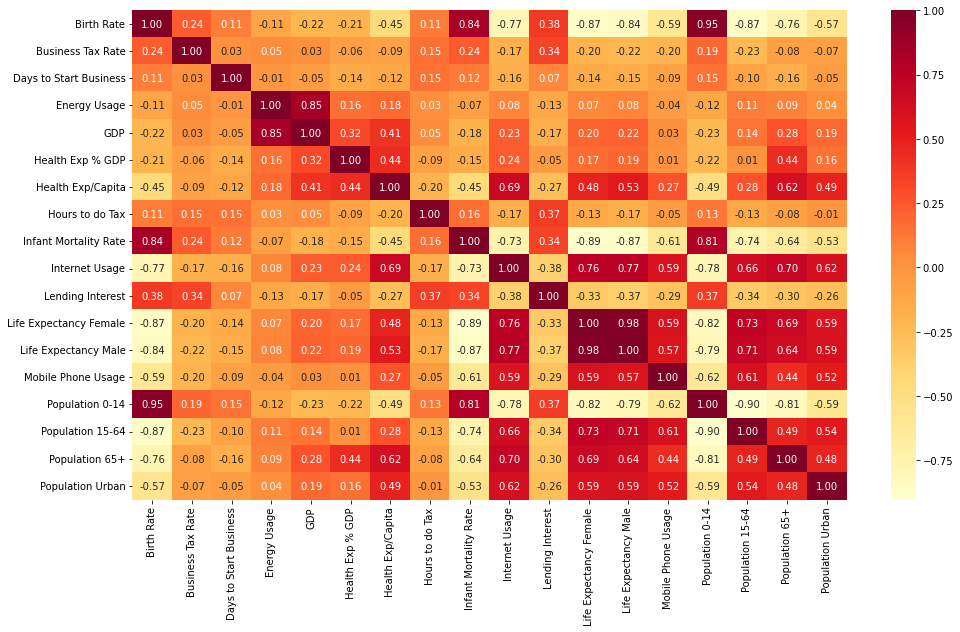

In [ ]:
#show the corelation between data
plt.figure(figsize=(16,9))
sns.heatmap(df_nonnominal.corr(),cmap="YlOrRd",annot=True,fmt='.2f')
plt.show()

**According to the HeatMap, prefer to select those attributes which have higher correlation for testing,**

so I choose 'Energy Usage VS GDP', 'birth rate VS infant mortality rate' and'birth rate and population 0-14' for test:

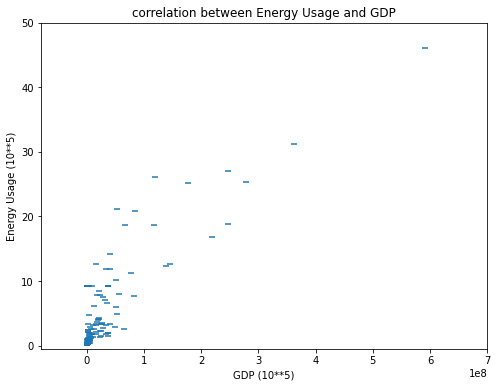

In [ ]:
#scatter plot between Energy Usage and GDP
plt.figure(figsize=(8,6))
plt.scatter(df_nonnominal['GDP']/10000,df_nonnominal['Energy Usage']/10000,marker='_')
plt.ylim(-0.5,50)
plt.xlim(-80000000,700000000)
plt.xlabel('GDP (10**5)')
plt.ylabel('Energy Usage (10**5)')
plt.title('correlation between Energy Usage and GDP')
plt.show()

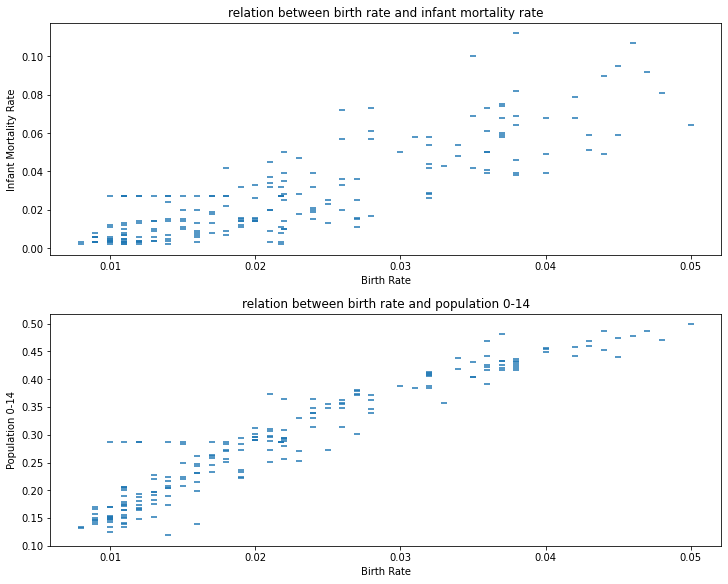

In [ ]:
from matplotlib.colorbar import constrained_layout

fig,ax=plt.subplots(2,figsize=(10,8),constrained_layout=True)
ax[0].scatter(x=df_nonnominal['Birth Rate'],y=df_nonnominal['Infant Mortality Rate'],marker='_')
ax[0].set_xlabel('Birth Rate')
ax[0].set_ylabel('Infant Mortality Rate')
ax[0].set_title('relation between birth rate and infant mortality rate')

ax[1].scatter(x=df_nonnominal['Birth Rate'],y=df_nonnominal['Population 0-14'],marker='_')
ax[1].set_xlabel('Birth Rate')
ax[1].set_ylabel('Population 0-14')
ax[1].set_title('relation between birth rate and population 0-14')
plt.show()

***Insight***: 

From the scatter plot above, the Birth Rate and the population between 0-14, the Birth Rate and the Infant Mortality Rate are both linear associated.

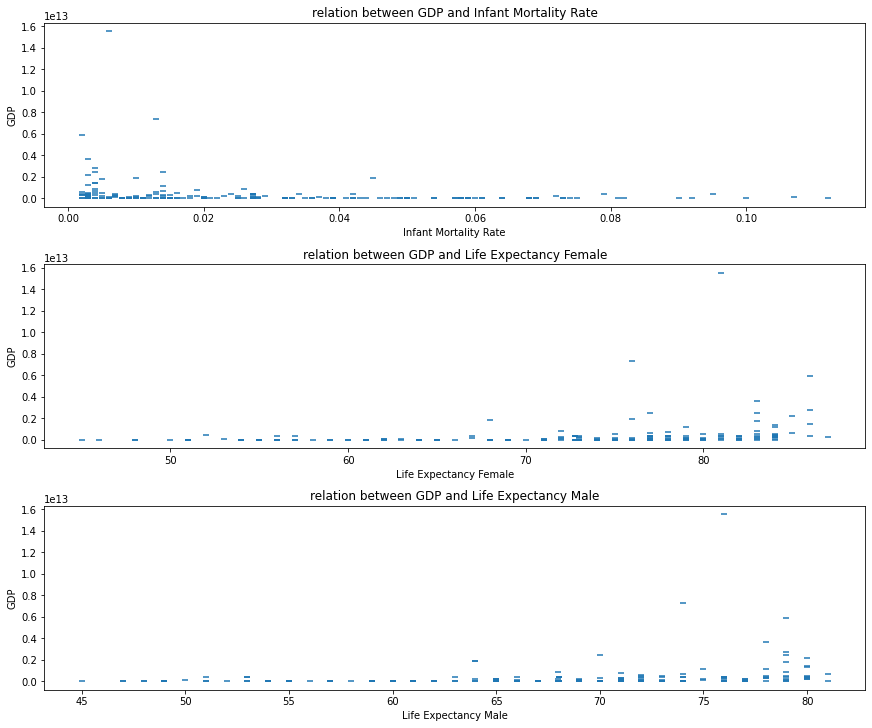

In [ ]:
from matplotlib.colorbar import constrained_layout

fig,ax=plt.subplots(3,figsize=(12,10),constrained_layout=True)
ax[0].scatter(x=df_nonnominal['Infant Mortality Rate'],y=df_nonnominal['GDP'],marker='_')
ax[0].set_xlabel('Infant Mortality Rate')
ax[0].set_ylabel('GDP')
ax[0].set_title('relation between GDP and Infant Mortality Rate')

ax[1].scatter(x=df_nonnominal['Life Expectancy Female'],y=df_nonnominal['GDP'],marker='_')
ax[1].set_xlabel('Life Expectancy Female')
ax[1].set_ylabel('GDP')
ax[1].set_title('relation between GDP and Life Expectancy Female')

ax[2].scatter(x=df_nonnominal['Life Expectancy Male'],y=df_nonnominal['GDP'],marker='_')
ax[2].set_xlabel('Life Expectancy Male')
ax[2].set_ylabel('GDP')
ax[2].set_title('relation between GDP and Life Expectancy Male')

plt.show()

In [ ]:
!jupyter nbconvert --to html IE5374_Project1_task2_11_20.ipynb

[NbConvertApp] Converting notebook IE5374_Project1_task2_11_20.ipynb.ipynb to html
[NbConvertApp] Writing 888119 bytes to IE5374_Project1_task2_11_20.ipynb.html
